In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import time 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt
# https://github.com/MaartenGr/KeyBERT

In [3]:
df = pd.read_csv('internshala_clean.csv')

### One hot encode

+ Perks
+ Location

In [4]:
# pd.get_dummies(df, columns=['perks'], prefix_sep='\n')
df.perks = df.perks.apply(lambda s: ",".join(x.strip() for x in s.split('\n')) if type(s) == str else None)

In [5]:
perk_ohe = df.perks.str.get_dummies(',')
location_ohe = df.location.str.get_dummies(',')
duration_ohe = pd.get_dummies(df.duration)
pd.concat([df, perk_ohe, location_ohe, duration_ohe], axis=1)

,location,domain_profile,company_name,about_the_work_from_home_job/internship,skills,who_can_apply,other_requirements,perks,number_of_openings,company_details,...,2 Months,2 Weeks,3 Months,3 Weeks,4 Months,4 Weeks,5 Months,5 Weeks,6 Months,6 Weeks
0,Work From Home,Embedded Android Development,Augrade Private Limited,Selected intern's day-to-day responsibilities ...,Java\nLinux\nEmbedded Systems\nC Programming\n...,Only those candidates can apply who:\n1. are a...,1. Experience in hands-on development and trou...,"Certificate,Flexible work hours,5 days a week",2,"At Augrade, we work to rethink tomorrow and im...",...,0,0,0,0,0,0,1,0,0,0
1,Work From Home,Technical Project Management,Zansys Technologies,Selected intern's day-to-day responsibilities ...,PHP\nSoftware Testing\nReactJS,Only those candidates can apply who:\n1. are a...,NaN,"Certificate,5 days a week",1,Website\nZansys Technologies is a software ser...,...,0,0,0,0,1,0,0,0,0,0
2,Work From Home,Full Stack Development (Web+Flutter),Rising Youth Foundation,Selected intern's day-to-day responsibilities ...,MongoDB\nNode.js\nFlutter\nREST API\nDart\nAnd...,Only those candidates can apply who:\n1. are a...,NaN,"Certificate,Letter of recommendation",1,Facebook page\nRising Youth Foundation is an A...,...,0,0,0,0,0,0,0,0,0,0
3,Aurangabad,Web Development,44property,NaN,HTML\nCSS\nJavaScript\njQuery\nMS-Office\nWord...,Only those candidates can apply who:\n1. are a...,NaN,"Certificate,Letter of recommendation,Flexible ...",5,Website\n44property is a website dedicated to ...,...,0,0,0,0,0,0,0,0,1,0
4,Work From Home,React Native Development,CogniAble,Selected intern's day-to-day responsibilities ...,HTML\nCSS\nReact Native\nRedux,Only those candidates can apply who:\n1. are a...,NaN,None,1,Website\nCogniAble is an organization working ...,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369,Work From Home,Web Development,TMS Foundation (IndiaYouth.info),Selected intern's day-to-day responsibilities ...,JavaScript\nJoomla\nLinux\nCodeIgniter\nLARAVE...,Only those candidates can apply who:\n1. are a...,NaN,"Certificate,Letter of recommendation,Flexible ...",3,Website\nWe at TMS are a group of task-driven ...,...,0,0,1,0,0,0,0,0,0,0
2370,Work From Home,Convolution Neural Network,Xcitedu Software Solutions Private Limited,Selected intern's day-to-day responsibilities ...,JavaScript\nMongoDB\nMachine Learning\nReact N...,Only those candidates can apply who:\n1. are a...,NaN,None,20,Xcitedu is an online learning platform that pr...,...,0,0,0,0,0,0,0,0,1,0
2371,Work From Home,Web Development,Creatif Minds,1. Working on direct client projects and handl...,PHP\nCSS\nJavaScript\nBootstrap\nReactJS\nSCSS...,Only those candidates can apply who:\n1. are a...,NaN,"Certificate,Letter of recommendation,Flexible ...",4,Creatif Minds offers professional and high-qua...,...,0,0,1,0,0,0,0,0,0,0
2372,Jaipur,Front End Development,Pingal IT Solutions,NaN,HTML\nCSS\nJavaScript\nAdobe Photoshop\nCorelD...,Only those candidates can apply who:\n1. are a...,NaN,"Certificate,Letter of recommendation,5 days a ...",2,LinkedIn page\nPingal IT Solutions is a global...,...,0,0,1,0,0,0,0,0,0,0


In [6]:
drop_cols = ['domain_profile', 'company_name', 
             'about_the_work_from_home_job/internship', 
             'who_can_apply', 'other_requirements',
            'company_details', 'min_stipend', 'max_stipend', 'stipend',
            'start_date', 'apply_by', 'about_the_internship', 
             'additional_information', 'about_part_time_job/internship', 
             'location', 'perks', 'skills', 'duration']

df = df.drop(drop_cols, axis=1)

In [7]:
df.columns.tolist()

['number_of_openings',
 'is_part_time',
 'applicants',
 '.NET',
 '3ds Max',
 'AJAX',
 'ANSYS',
 'ARM Microcontroller',
 'ASP.NET',
 'Adobe After Effects',
 'Adobe Creative Suite',
 'Adobe Dreamweaver',
 'Adobe Flash',
 'Adobe Illustrator',
 'Adobe Indesign',
 'Adobe Photoshop',
 'Adobe Photoshop Lightroom CC',
 'Adobe Premiere Pro',
 'Adobe XD',
 'Algorithms',
 'Amazon Web Server (AWS)',
 'Amazon Web Services (AWS)',
 'American English',
 'Android',
 'Angular 2.0',
 'Angular 7.0',
 'AngularJS',
 'Animation',
 'Ansible',
 'Apache',
 'Apache Cassandra',
 'Arduino',
 'Articulate 360',
 'Articulate Storyline',
 'Artifical Intelligence',
 'Audio Editing',
 'Autodesk Fusion 360',
 'Autodesk Maya',
 'BIG DATA ANALYTICS',
 'Blender 3D',
 'Blockchain',
 'Blogging',
 'Bootstrap',
 'C Programming',
 'C#',
 'C#.NET',
 'C++ Programming',
 'CCNA',
 'CI/CD',
 'CMS',
 'CSS',
 'Catalyst MVC Web Framework',
 'Chemistry',
 'Cinema 4D',
 'Circuit Design',
 'Client Relationship',
 'Cloud Computing',
 'Clou

## Modelling

Stipend Prediction based on Skills, duration, perks, location

In [8]:
df

,number_of_openings,is_part_time,applicants,.NET,3ds Max,AJAX,ANSYS,ARM Microcontroller,ASP.NET,Adobe After Effects,...,Windows Mobile Application Development,Wireframing,WordPress,XML,Xamarin,Xcode,Yii,iOS,jQuery,mean_stipend
0,2,1,295,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11500.0
1,1,0,56,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10000.0
2,1,0,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6250.0
3,5,0,33,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,2000.0
4,1,0,48,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369,3,1,37,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2370,20,0,194,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2371,4,0,109,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000.0
2372,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2000.0


In [9]:
X, y = df.drop('mean_stipend', axis=1), df.mean_stipend

x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.10)

### Building an Ad Hoc Model

In [69]:
random_forest_model = RandomForestRegressor(n_estimators=400)

random_forest_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=400)

In [70]:
prediction  = random_forest_model.predict(x_test)

In [71]:
random_forest_model.score(x_test, y_test)

0.3335715994365913

In [72]:
mean_squared_error(y_test, prediction, squared=False)

5042.588499784311

In [13]:
y_test

1391    20000.0
1923     2000.0
2327     4000.0
2325     8500.0
1528     1000.0
         ...   
1679    22500.0
1810    12000.0
68       1000.0
1196     4250.0
925      9000.0
Name: mean_stipend, Length: 238, dtype: float64

In [63]:
np.abs(y_test - prediction).mean()

3324.4615491831382

### Hyperparameter Tuning

In [73]:
max_depth = np.ceil(np.log2(df.shape[0]))

min_depth = np.floor(max_depth/2)

param_tune = {
             'n_estimators': [100,200,300,400],
             'max_features': ['auto','sqrt','log2'],
             'max_leaf_nodes':[400,800,1200,],
             'max_depth':np.arange(min_depth,max_depth),
             'min_samples_leaf':np.arange(1,10)
}

base_model = RandomForestRegressor()
rs = RandomizedSearchCV(base_model , param_tune, n_jobs=-1, cv=5, verbose=10, scoring='neg_mean_squared_error', n_iter=100)

rs.fit(x_train,y_train)

print(rs.best_estimator_.score(x_test,y_test))
print(rs.best_score_)
np.abs(rs.best_estimator_.score(x_test,y_test) - prediction).mean()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
0.1935885780108828
-26099236.413385745


7467.697491011775

In [67]:
np.abs(rs.best_estimator_.score(x_test,y_test) - prediction).mean()

7427.158617970578

In [68]:
mean_squared_error(rs.best_estimator_.predict(x_test), y_test, squared=False)

5494.871578100364

In [52]:
fine_tuned_estimator = RandomForestRegressor(max_depth=6.0, max_features='sqrt', max_leaf_nodes=1200,
                      min_samples_leaf=7, n_estimators=400)
fine_tuned_estimator.fit(x_train, y_train)
fine_tune_preds = fine_tuned_estimator.predict(x_test)
mean_squared_error(y_test, fine_tune_preds, squared=False)

6022.713350633436

In [33]:
base_model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

### Feature Importance

In [93]:
start_time = time.time()
importances = random_forest_model.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in random_forest_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.069 seconds


In [94]:
forest_importances = pd.DataFrame({'importance':importances, 'feature_name':x_train.columns.tolist()})

In [101]:
forest_importances.sort_values(by='importance', ascending=False,  inplace=True)

/Users/admin/Projects/Msc/Data Mining/mining-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Feature Importance of Trained RF for predicting Stipend')

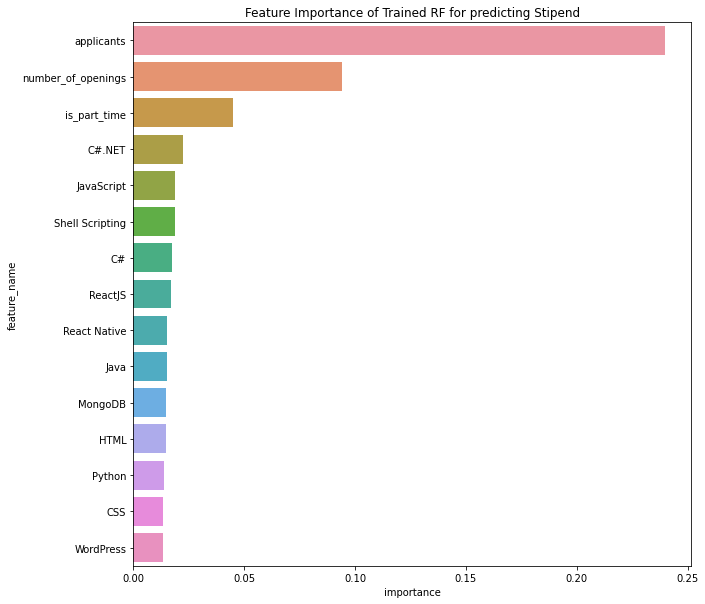

In [110]:
plt.figure(figsize=(10,10))
ax = sns.barplot(forest_importances.importance[:15], forest_importances.feature_name[:15])
ax.set_title('Feature Importance of Trained RF for predicting Stipend')